# In-Class Quiz Nº 2

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: Pedro Gonçalves
## Number: 45890

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANT:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q2.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: MNIST dataset (small version) - pickle file $\texttt{MNISTsmall.p}$
## This file has the following variables (in a dictionary)
* ### X1: training data ($1000\times784$  uint8 array)
* ### y1: classes of the training data (numbers 0 to 9)
* ### X2: test data ($5000\times784$ uint8 array)
* ### y2: classes of the test data (numbers 0 to 9)

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import  train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import pickle
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig = plt.figure(figsize=(6.5, 6.5))
    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha='right')
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#load data
D=pickle.load(open('MNISTsmall.p','rb'))
X1=D.X1*1.
X2=D.X2*1.
y1=D.y1
y2=D.y2

# Question 1: Binary Classification
##  Consider the examples of class three (3) as the positive class and the remaning classes as the negative examples.
### a) Use the training set to find which dimensions of the data have a variance less than one hundred (100). Print this number and remove these dimensions from the training and test sets.
### b) Use the training data to train a $\texttt{LinearSVC}$ classifier with the following parameters: $\texttt{random_state=42}$ and $\texttt{C=0.1}$. Print the total number of errors and the confusion matrix for the test data.
### c) Plot the ROC curve of this classifier with the test data. Include in this plot the operating point of the classifier.
### d) Pre-process the data of item 1.a) using the function  $\texttt{StandardScaler}$. Train this function with the training data and apply the transformation to the training and test sets. Use the new training data to train a $\texttt{LinearSVC}$ classifier with the following parameters: $\texttt{random_state=42}$ and $\texttt{C=0.1}$. Print the total number of errors and the confusion matrix for the new test data.
### e) In the same figure, plot the ROC curves of the classifiers of item 1.b) and 1.d) with the respective test data. Include in this plot the operational points of both classifiers.

In [90]:
#binary labels
y1b=(y1==3)*1
y2b=(y2==3)*1

## 1.a)

In [91]:
condition = X1.var(axis=0) < 100
X1v = X1[:, condition]
X2v = X2[:, condition]

print (X1v.shape)
print (X2v.shape)

print('Removed:', np.sum(condition==False))

(10000, 258)
(5000, 258)
Removed: 526


## 1.b)

C:\Users\Pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Errors: 506
Confusion matrix, without normalization


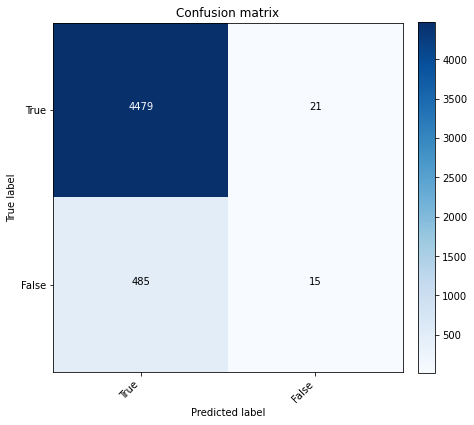

In [92]:
svc = LinearSVC(random_state=42, C=0.1).fit(X1v,y1b)
y2_predicted = svc.predict(X2v)

print('Errors:', np.sum(y2b != y2_predicted))
cm = confusion_matrix(y2b, y2_predicted)
plot_confusion_matrix(cm, [True, False])

## 1.c)

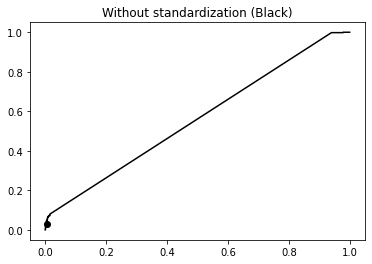

In [101]:
y2c = svc.decision_function(X2v)
fpr, tpr, t = roc_curve(y2b, y2c)

fp = 21 / (4479 + 21)
tp = 15 / (485 + 15)

plt.figure()
plt.title('Without standardization (Black)')
plt.plot(fpr, tpr, color='k')
plt.plot(fp, tp, "ok")

## 1.d)

C:\Users\Pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Errors: 499
Confusion matrix, without normalization


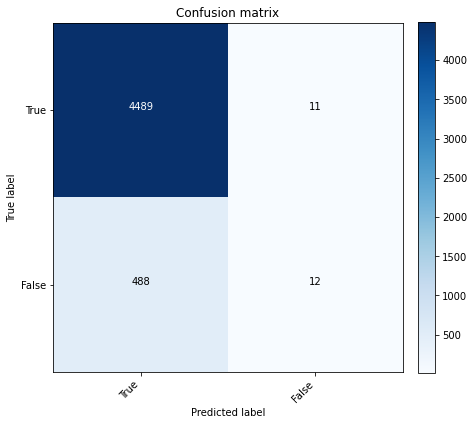

In [94]:
sc = StandardScaler().fit(X1v)
X1s=sc.transform(X1v)
X2s=sc.transform(X2v)

svc = LinearSVC(random_state = 42, C = 0.1).fit(X1s, y1b)
y2_predicted = svc.predict(X2s)

print('Errors:', np.sum(y2b != y2_predicted))
cm = confusion_matrix(y2b, y2_predicted)
plot_confusion_matrix(cm, [True, False])

## 1.e)

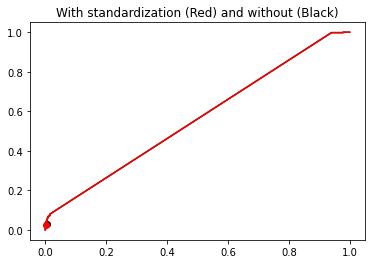

In [102]:
y2c_s = svc.decision_function(X2s)
fpr_s, tpr_s, t_s = roc_curve(y2b, y2c)

fp_s = 11 / (4489 + 11)
tp_s = 12 / (488 + 12)

fp = 21 / (4479 + 21)
tp = 15 / (485 + 15)

plt.figure()
plt.title('With standardization (Red) and without (Black)')
plt.plot(fpr, tpr, color='k')
plt.plot(fp, tp, "ok")
plt.plot(fpr_s, tpr_s, color='r')
plt.plot(fp_s, tp_s, "or")

<hr style="border:2px solid black"> </hr>

# Question 2 - Multi-Class Classification:
## Consider the original train and test datasets form the $\texttt{MNISTsmall.p}$ (10 classes).
### a) Pre-process the data using the function  $\texttt{PCA}$. Train this function with the training data and apply the transformation to the training and test sets. Preseve only the first 50 principal componentes of the data. Use the pre-processed data in the following items.
### b) Train with the training set a $\texttt{RandomForestClassifier}$ with the following parameters: $\texttt{random_state=42}$ and $\texttt{max_depth=10}$. Print the total number of errors and the confusion matrix for the test data.
### c)  Divide the training set in two: a training and a validation set. Use the function $\texttt{train_test_split}$ with the following parameters: $\texttt{train_size=7000}$, $\texttt{random_state=42}$ and $\texttt{stratify=y1}$
### d) Use the training set of the previous item to train the $\texttt{RandomForestClassifier}$ (with $\texttt{random_state=42}$ and $\texttt{max_depth=10}$) and check which value for the parameter $\texttt{n_estimators}$ gives the best score in the validation set. Test the following values for the parameter $\texttt{n_estimators}$: 200, 225, 250, 275 and 300.
### e) Re-train with the whole training set (10000 examples) the $\texttt{RandomForestClassifier}$ (with $\texttt{random_state=42}$ and $\texttt{max_depth=10}$) with the best value obtained in the previous item for the parameter $\texttt{n_estimators}$.  Print the total number of errors and the confusion matrix for the test data.

## 2.a)

In [96]:
pca = PCA(n_components=50).fit(X1)
X1t = pca.transform(X1)
X2t = pca.transform(X2)

## 2.b)

Errors: 619
Confusion matrix, without normalization


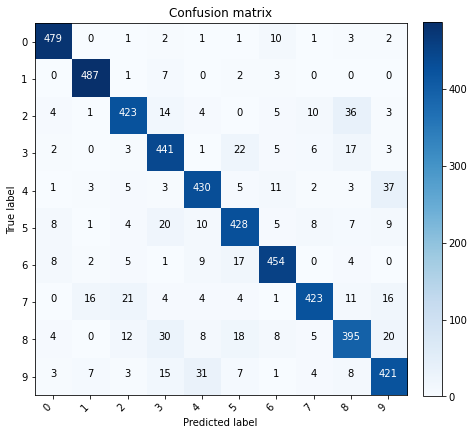

In [97]:
rf = RandomForestClassifier(random_state=42, max_depth=10).fit(X1t, y1)
y2_predicted = rf.predict(X2t)

print('Errors:', np.sum(y2 != y2_predicted))
cm = confusion_matrix(y2, y2_predicted)
plot_confusion_matrix(cm, classes=range(10))

## 2.c)

In [98]:
X_train, X_val, y_train, y_val = train_test_split(X1t, y1, train_size=7000, random_state=42, stratify=y1)

## 2.d)

In [99]:
best_score = 0
best_n_estimator = 0
for n_estimator in [200, 225, 250, 275, 300]:
    rf = RandomForestClassifier(random_state=42, max_depth=10, n_estimators=n_estimator).fit(X_train, y_train)
    score = rf.score(X_val, y_val)
    if (score > best_score):
        best_score = score
        best_n_estimator = n_estimator
print('Best n_estimator value:', best_n_estimator)
print('Best score:', best_score)
    

Best n_estimator value: 300
Best score: 0.905


## 2.e)

Errors: 600
Confusion matrix, without normalization


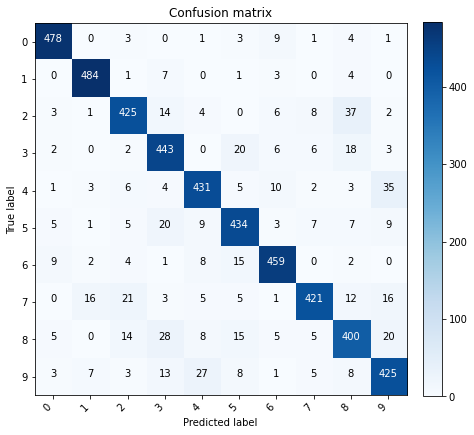

In [103]:
rfc = RandomForestClassifier(random_state=42, max_depth=10, n_estimators=best_n_estimator).fit(X1t, y1)
y2_predicted = rfc.predict(X2t)

print("Errors:", np.sum(y2 != y2_predicted))
plot_confusion_matrix(confusion_matrix(y2, y2_predicted), classes=range(10))